# GLASS simulation data demo
---

In [1]:
from glass_glxy import * #glxy_simulation, plot_reshift_catalogue

## 1. Prior Parameters: $\bm{\theta}\sim P(\bm{\theta})$

In [2]:
def prior_param_samples(h_range, Oc_range, Ob_range, type, n_samples):
    assert isinstance(h_range, tuple) and len(h_range) == 2, "h_range must be a tuple of (min, max)"
    assert isinstance(Oc_range, tuple) and len(Oc_range) == 2, "Oc_range must be a tuple of (min, max)"
    assert isinstance(Ob_range, tuple) and len(Ob_range) == 2, "Ob_range must be a tuple of (min, max)"
    assert type in ["uniform", "normal"], "type must be either 'uniform' or 'normal'"
    assert isinstance(n_samples, int) and n_samples > 0, "n_samples must be a positive integer"
    if type == "uniform":
        h_samples = np.random.uniform(h_range[0], h_range[1], n_samples)
        Oc_samples = np.random.uniform(Oc_range[0], Oc_range[1], n_samples)
        Ob_samples = np.random.uniform(Ob_range[0], Ob_range[1], n_samples)
        samples = np.vstack((h_samples, Oc_samples, Ob_samples)).T
    elif type == "normal":
        cov = np.diag([h_range[1] - h_range[0], Oc_range[1] - Oc_range[0], Ob_range[1] - Ob_range[0]])**2 / 12
        mean = [(h_range[0] + h_range[1]) / 2, (Oc_range[0] + Oc_range[1]) / 2, (Ob_range[0] + Ob_range[1]) / 2]
        samples = np.random.multivariate_normal(mean, cov, n_samples)
    return samples


h_range = (0.6, 0.8)
Oc_range = (0.2, 0.4)
Ob_range = (0.03, 0.05)
n_samples = 2
uniform_samples = prior_param_samples(h_range, Oc_range, Ob_range, "uniform", n_samples)
normal_samples = prior_param_samples(h_range, Oc_range, Ob_range, "normal", n_samples)


##  2. Simulated Data: $\bm{x}|\bm{\theta}$

In [3]:
cosmo_param_samples = []
catalogue_samples = []
redshift_param_samples = []
for i in range(uniform_samples.shape[0]):
    h, Oc, Ob = uniform_samples[i]
    sim = glxy_simulation(h, Oc, Ob)
    cosmo_param_samples.append(sim[0])
    catalogue_samples.append(sim[1])
    redshift_param_samples.append(sim[2])

# print(cosmo_param_samples[1])
# print(catalogue_samples[1])
# print(type(catalogue_samples[1][0]))
# print(redshift_param_samples[1])

33it [00:32,  1.01it/s]


Total number of galaxies sampled: 22,277,493


37it [00:38,  1.04s/it]

Total number of galaxies sampled: 22,276,447


Perform redshift catalogue check

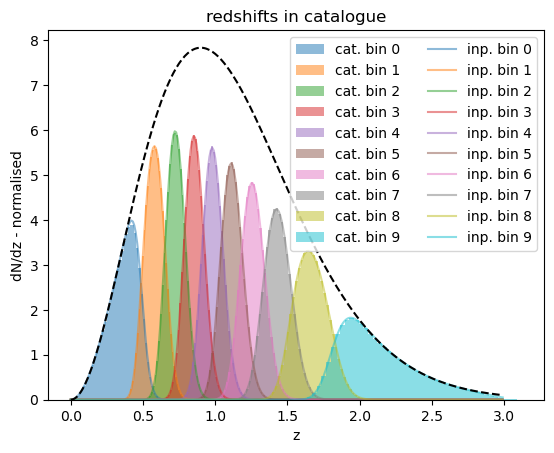

In [4]:
plot_redshift_catalogue(catalogue_samples[0], redshift_param_samples[0])